In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
connection = sqlite3.connect('data/jobs.db')

,de_posts,ds_posts
0,590,474


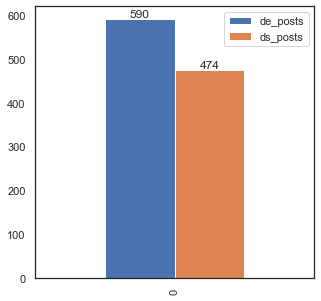

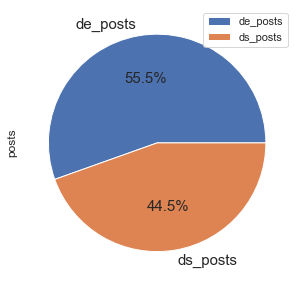

In [75]:
df = pd.read_sql("""
    SELECT
        SUM(CASE WHEN job_role='de' THEN 1 ELSE 0 END) AS de_posts,
        SUM(CASE WHEN job_role='ds' THEN 1 ELSE 0 END) AS ds_posts
    FROM
        jobs    """,con=connection)

sns.set_theme('notebook')
sns.set_style('white')

ax = df.plot(kind='bar', figsize=(5,5)) # use ax to then plot values
for container in ax.containers:
    ax.bar_label(container)
df[['de_posts','ds_posts']].T.plot(kind='pie', y=0, ylabel='posts', autopct='%1.1f%%', figsize=(5,5), fontsize=15) # Transpose and plot
df

,country,total_posts,de_posts,ds_posts
0,us,500,245,255
1,in,123,89,34
2,de,71,44,27
3,uk,61,40,21
4,ca,48,25,23
5,fr,46,24,22
6,nl,21,11,10
7,it,16,9,7
8,se,14,8,6
9,pl,14,11,3


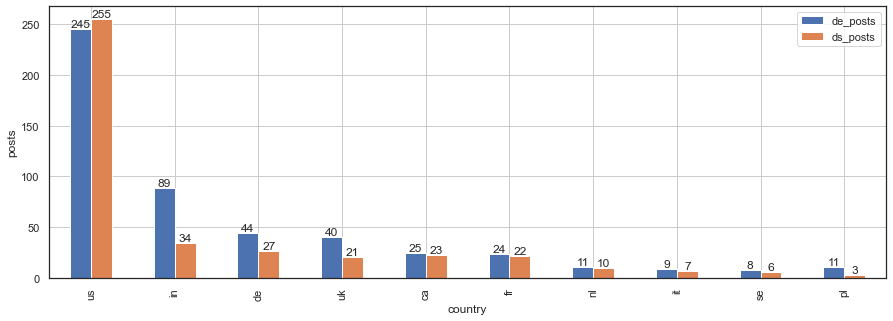

In [67]:
df = pd.read_sql("""
    SELECT
        country,
        COUNT(*) AS total_posts,
        SUM(CASE WHEN job_role='de' THEN 1 ELSE 0 END) AS de_posts,
        SUM(CASE WHEN job_role='ds' THEN 1 ELSE 0 END) AS ds_posts
    FROM
        jobs
    GROUP BY
        country
    ORDER BY
        count(*) DESC
    LIMIT
        10   """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
ax = df[['country','de_posts','ds_posts']].plot(kind='bar', x='country', figsize=(15,5), ylabel='posts', grid=True)
for container in ax.containers:
    ax.bar_label(container)
df

In [4]:
df = pd.read_sql("""
    SELECT
        scrape_date,
        COUNT(*)
    FROM
        jobs
    GROUP BY
        scrape_date
    ORDER BY
        count(*) DESC   """,con=connection)
df

,scrape_date,COUNT(*)
0,2022-04-23,928
1,2022-04-24,136


In [5]:
df = pd.read_sql("""
    SELECT
        job_role_ext,
        SUM(CASE
            WHEN UPPER(description) LIKE '%SQL%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float) *100 AS sql_percentage,
        SUM(CASE
            WHEN UPPER(description) LIKE '%PYTHON%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float) *100 AS python_percentage,
        SUM(CASE
            WHEN UPPER(description) LIKE '%AIRFLOW%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float) *100 AS airflow_percentage,
        SUM(CASE
            WHEN UPPER(description) LIKE '%AWS%' OR
            UPPER(description) LIKE '%GCP%' OR 
            UPPER(description) LIKE '%AZURE%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float) *100 AS cloud_percentage
    FROM
        jobs
    GROUP BY
        job_role_ext
    ORDER BY
        2 DESC
    LIMIT
        10   """,con=connection)
df

,job_role_ext,sql_percentage,python_percentage,airflow_percentage,cloud_percentage
0,data engineer,76.440678,65.593220,17.457627,60.000000
1,data scientist,64.345992,84.599156,3.375527,28.902954


In [29]:
connection.close()

wordcloud!!! and graphs. world map